In [115]:
import torch
from torch import Tensor
import matplotlib.pyplot as plt
import math
import numpy as np

In [116]:
def one_hot_embedding(labels, num_classes):
    """Embedding labels to one-hot form.

    Args:
      labels: (LongTensor) class labels, sized [N,].
      num_classes: (int) number of classes.

    Returns:
      (tensor) encoded labels, sized [N, #classes].
    """
    y = torch.eye(num_classes) 
    return y[labels]

In [125]:
def generate_disk_dataset(n_points ,one_hot_labels=True):
    input = Tensor(n_points, 2).uniform_(0,1)
    center = Tensor([1/2,1/2]).view(1, -1)
    label = ((input - center).norm(p=2, dim=1) < 1/math.sqrt(2*math.pi)).long()
    if(one_hot_labels):
        label = one_hot_embedding(label, 2)
    return input, label

In [126]:
input, label = generate_disk_dataset(1000, True)

In [128]:
def plot_with_labels(input, labels,ax):
    colors = []
    for b in labels:
        if (b==1):
            colors.append('r')
        else:
            colors.append('b')
    ax.scatter(input[:,0],input[:,1],color = colors)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

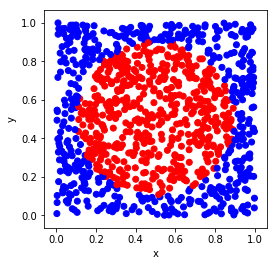

In [130]:
train_label = label.max(dim = 1)[1].long()
fig_train, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), sharex=True)
plot_with_labels(input, train_label, axes)